**SMOTE**
SMOTE = Synthetic Minority Oversampling Technique

- It is a technique use din machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. 
- SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.



In [19]:
# ****** SMOTE - Synthetic Minority Over-sampling Technique ******
# make_classification is used to create synthetic(i.e. artificial) classification datasets.
# make_classification generates fake data where each row is a sample and each sample has features, and each sample belongs to a class (0/1 or multi-class).
# make_classification.n_informative: Informative features are the features that directly influence the output.
# make_classification.n_redundant: Informative features are the features that directly influence the output. 
# - These redundant features do not contain new information — they are made from linear combinations of the informative ones.
from sklearn.datasets import make_classification

# 1) Create a synthetic imbalanced dataset
# x = inputs - feature1, feature2 - randomly generated
# y - output = target - 0's and 1's - randomly generated
x,y = make_classification(n_samples=1000,    # total number of samples(rows)
                    n_features=2,      # total number of features(columns)
                    n_clusters_per_class=1,
                    weights=[0.9, 0.1], # 90% of samples belong to class 0, 10% belong to class 1, making this an imbalanced dataset
                    n_redundant=0,# no redundant features in this dataset
                    random_state=12)    # for reproducibility of results

import pandas as pd

df1 = pd.DataFrame(x, columns=['Feature1', 'Feature2'])
df2 = pd.DataFrame(y, columns=['target'])

# print(df1.head())
# print(df2.head())

# Concatenate the inputs and output dataframes to see the complete dataset
df_imbalanced_dataset = pd.concat([df1, df2], axis=1).reset_index(drop=True)

print(df_imbalanced_dataset['target'].value_counts()) #900 of class 0's, 100 of class 1's
print(df_imbalanced_dataset.head())

 

target
0    899
1    101
Name: count, dtype: int64
   Feature1  Feature2  target
0 -0.762898 -0.706808       0
1 -1.075436 -1.051162       0
2 -0.610115 -0.909802       0
3 -2.023284 -0.428945       1
4 -0.812921 -1.316206       0


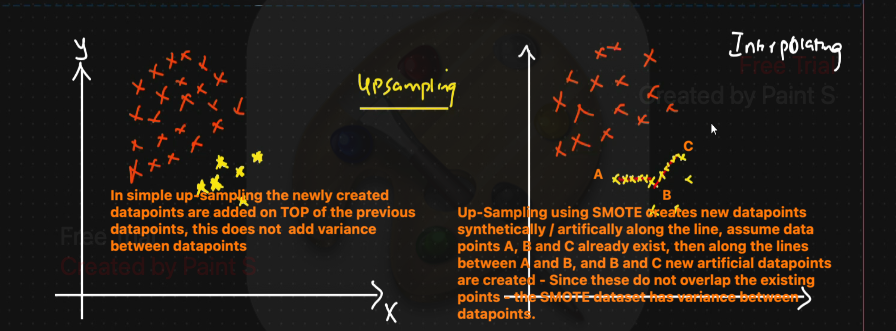

In [32]:
from IPython.display import Image
Image(filename='resources/smote.png',height=600,width=600)

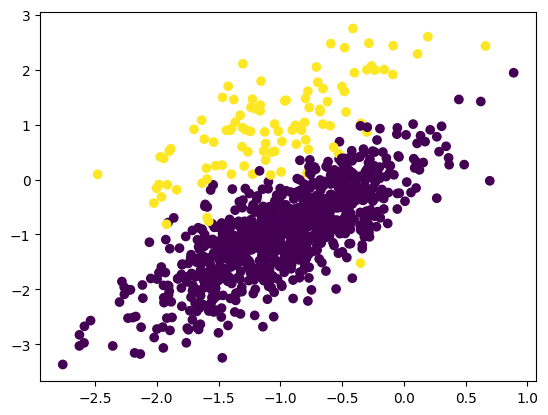

In [20]:
# 2) Visualize the imbalanced dataset using scatter plot
# In this plot the YELLOW are the minority class(1's) - 100 datapoints
# - and PURPLE are the majority class(0's) - 900 datapoints
import matplotlib.pyplot as plt
plt.scatter(df_imbalanced_dataset['Feature1'], df_imbalanced_dataset['Feature2'], c=df_imbalanced_dataset['target'])



x.shape =  (1798, 2) y.shape (1798,)
   Feature1  Feature2  target
0 -0.762898 -0.706808       0
1 -1.075436 -1.051162       0
2 -0.610115 -0.909802       0
3 -2.023284 -0.428945       1
4 -0.812921 -1.316206       0


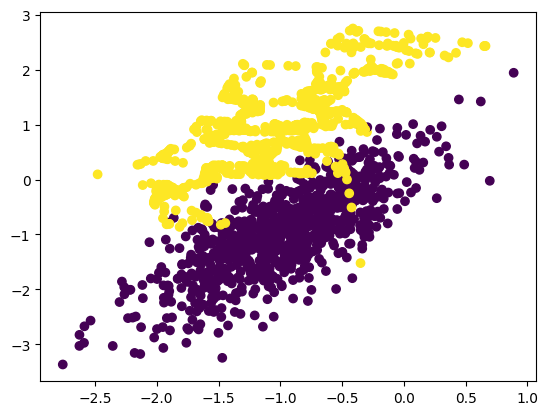

In [28]:
#3) Applying SMOTE to handle the imbalanced dataset
# Need to run 'pip install imblearn'
from imblearn.over_sampling import SMOTE    

oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(df_imbalanced_dataset[['Feature1', 'Feature2']], df_imbalanced_dataset['target'])
print('x.shape = ',X_smote.shape, 'y.shape',y_smote.shape)  #(1800, 2), (1800,)

# print(X_smote.head());
# print(y_smote.head());

df_oversampled_smote = pd.concat([pd.DataFrame(X_smote, columns=['Feature1', 'Feature2']), pd.DataFrame(y_smote, columns=['target'])], axis=1) 
print(df_oversampled_smote.head());

# Visualize the oversampled dataset using scatter plot
# In this plot the YELLOW are the minority class(1's) - 900 datapoints - YELLOW before applying SMOTE were 100 datapoints
# YELLOW datapoints are connected as synthetic data points are created. In the previous plot (without SMOTE) the YELLOW datapoints were scattered.
# - and PURPLE are the majority class(0's) - 900 datapoints
import matplotlib.pyplot as plt
plt.scatter(df_oversampled_smote['Feature1'], df_oversampled_smote['Feature2'], c=df_oversampled_smote['target'])